In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
movies = pd.read_csv('dataset/IMDb movies.csv')
print(f'Movie Data shape: {movies.shape}\nData Columns: {movies.columns}')

Movie Data shape: (85855, 22)
Data Columns: Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')


c:\users\sunil\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


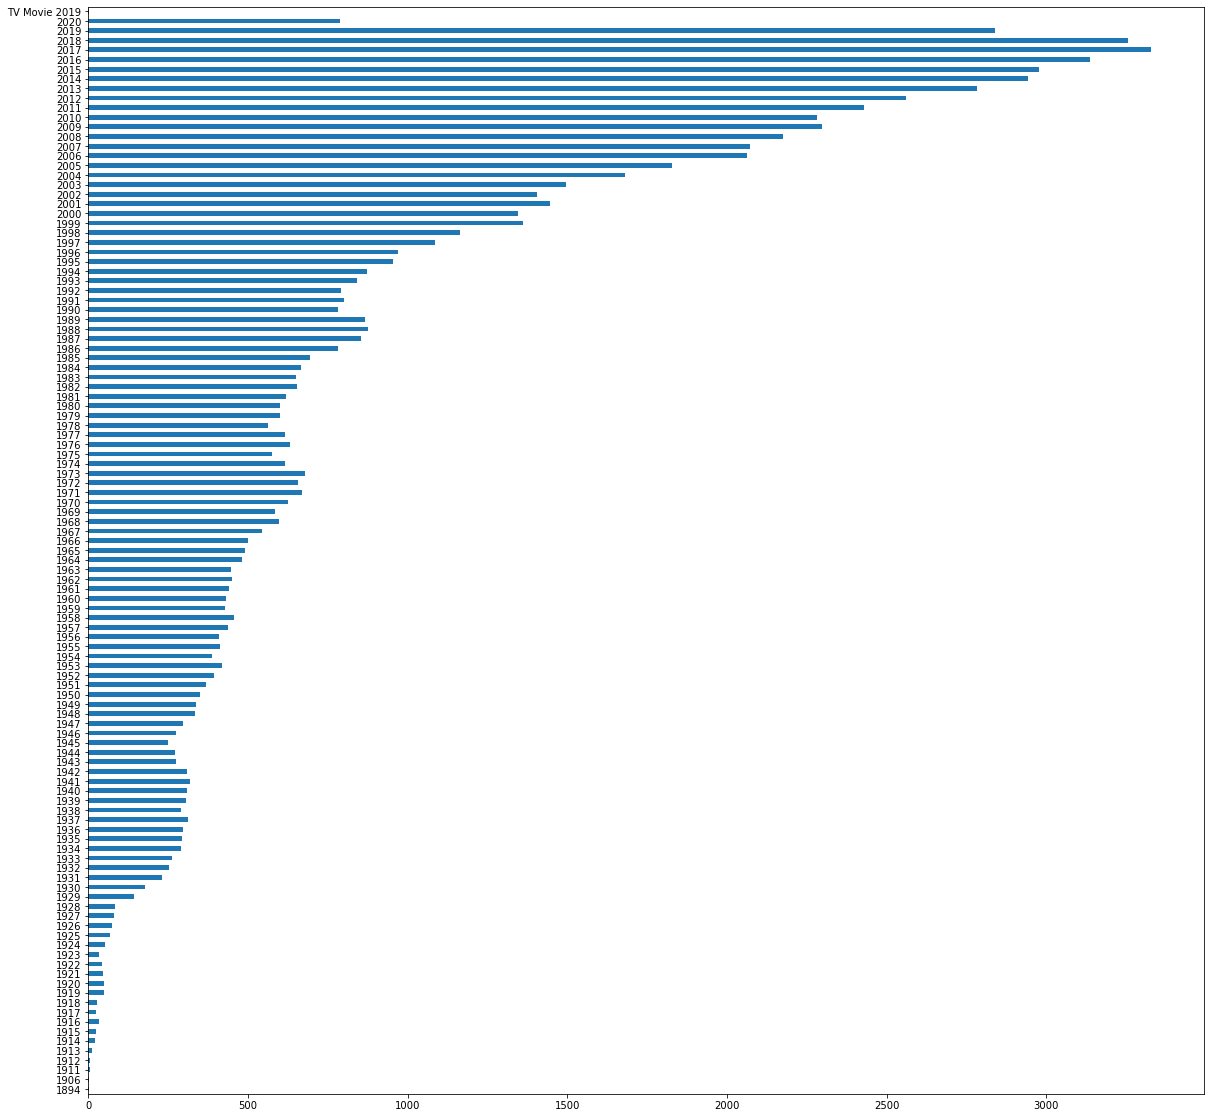

In [7]:
movies['year'] = movies['year'].astype(str)
movies.year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(20, 20))
plt.show()

In [8]:
features = ['director', 'actors', 'genre', 'title', 'avg_vote', 'votes']
movies = movies.loc[:, features]

In [9]:
# Replace NaN value with Unknown
def replaceNaN(columnName, value):
    movies[columnName] = movies[columnName].replace(np.nan, value)

[replaceNaN(feature, 'unknown') for feature in features[:-1]]

[None, None, None, None, None]

In [10]:
movies.head()

,director,actors,genre,title,avg_vote,votes
0,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",Romance,Miss Jerry,5.9,154
1,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...","Biography, Crime, Drama",The Story of the Kelly Gang,6.1,589
2,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Drama,Den sorte drøm,5.8,188
3,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...","Drama, History",Cleopatra,5.2,446
4,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...","Adventure, Drama, Fantasy",L'Inferno,7.0,2237


In [11]:
movies['title'] = movies['title'].str.lower()

In [12]:
def wiki_extract(year: str, index1, index2, index3, index4):
    wiki_link = f'https://en.wikipedia.org/wiki/List_of_American_films_of_{year}'
    df1 = pd.read_html(wiki_link, header=0)[index1]
    df2 = pd.read_html(wiki_link, header=0)[index2]
    df3 = pd.read_html(wiki_link, header=0)[index3]
    df4 = pd.read_html(wiki_link, header=0)[index4]
    df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
    return df

In [13]:
!pip install tmdbv3api

You should consider upgrading via the 'D:\movie_recommentation\movie-recommend\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [14]:
list_2019_movies = wiki_extract('2019', 2, 3, 4, 5)
remaining_2019_movies = list_2019_movies[~list_2019_movies['Title'].isin(movies['title'])]

In [15]:
remaining_2019_movies.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria...",[2]
1,JANUARY,4,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...,[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5]
4,JANUARY,11,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6]


In [16]:
movies.loc[movies['title'] == 'deadpool']

,director,actors,genre,title,avg_vote,votes
58026,Tim Miller,"Ryan Reynolds, Karan Soni, Ed Skrein, Michael ...","Action, Adventure, Comedy",deadpool,8.0,882037


In [17]:
'deadpool' in movies['title'].values

True

In [18]:
movies.loc[movies['title'] == 'The Upside']

,director,actors,genre,title,avg_vote,votes


In [19]:
list_2020_movies = wiki_extract('2020', 3, 4, 5, 6)
remaining_2020_movies = list_2020_movies[~list_2020_movies['Title'].isin(movies['title'])]

In [20]:
remaining_2020_movies.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2]
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3]
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Col...",[4]
3,JANUARY,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian...,NaN
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,Anthony Jerjen (director); Andrew Crabtree (sc...,[5]


In [21]:
'Wonder Woman 1984' in remaining_2020_movies['Title'].values

True

In [23]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '9865b34b094374f46b28c10fa0db1eb2'

In [61]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_movie_info(x, columnNam):
    try:
        info = []
        result = tmdb_movie.search(x)
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json[columnNam]:
            if columnNam == "genres":
                info_str = ", " 
                for i in range(0,len(data_json['genres'])):
                    info.append(data_json['genres'][i]['name'])
                return info_str.join(info)
            else:
                return data_json[columnNam]
        else:
            np.NaN
    except:
        print(x)

In [62]:
get_movie_info('Wonder Woman 1984', 'genres')

'Fantasy, Action, Adventure'

In [63]:
remaining_2019_movies['genres'] = remaining_2019_movies['Title'].map(lambda x: get_movie_info(str(x), 'genres'))
remaining_2020_movies['genres'] = remaining_2020_movies['Title'].map(lambda x: get_movie_info(str(x), 'genres'))
remaining_2019_movies['vote_average'] = remaining_2019_movies['Title'].map(lambda x: get_movie_info(str(x), 'vote_average'))
remaining_2020_movies['vote_average'] = remaining_2020_movies['Title'].map(lambda x: get_movie_info(str(x), 'vote_average'))
remaining_2019_movies['vote_count'] = remaining_2019_movies['Title'].map(lambda x: get_movie_info(str(x), 'vote_count'))
remaining_2020_movies['vote_count'] = remaining_2020_movies['Title'].map(lambda x: get_movie_info(str(x), 'vote_count'))

c:\users\sunil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\sunil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\sunil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [64]:
remaining_2020_movies.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres,vote_average,vote_count
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2],"Horror, Mystery, Thriller",5.9,2145.0
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3],"Action, Horror, Science Fiction, Thriller",6.3,1987.0
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Col...",[4],Comedy,6.5,466.0
3,JANUARY,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian...,NaN,Drama,6.6,46.0
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,Anthony Jerjen (director); Andrew Crabtree (sc...,[5],"Drama, Thriller, Crime",5.8,28.0


In [65]:
remaining_2019_movies = remaining_2019_movies[['Title','Cast and crew','genres', 'vote_average', 'vote_count']]
remaining_2020_movies = remaining_2020_movies[['Title','Cast and crew','genres', 'vote_average', 'vote_count']]

In [66]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [67]:
remaining_2019_movies['director'] = remaining_2019_movies['Cast and crew'].map(lambda x: get_director(x))
remaining_2020_movies['director'] = remaining_2020_movies['Cast and crew'].map(lambda x: get_director(x))

In [68]:
def get_actor(x):
    actors = (x.split("screenplay); ")[-1]).split(", ")
    return ', '.join(actors)

In [80]:
remaining_2019_movies['actors'] = remaining_2019_movies['Cast and crew'].map(lambda x: get_actor(x))
remaining_2020_movies['actors'] = remaining_2020_movies['Cast and crew'].map(lambda x: get_actor(x))

In [81]:
remaining_2020_movies.head()

,title,Cast and crew,genre,vote_average,vote_count,director,actors
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,"Horror, Mystery, Thriller",5.9,2145.0,Nicolas Pesce,"Andrea Riseborough, Demián Bichir, John Cho, B..."
1,Underwater,"William Eubank (director); Brian Duffield, Ada...","Action, Horror, Science Fiction, Thriller",6.3,1987.0,William Eubank,"Kristen Stewart, Vincent Cassel, Jessica Henwi..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy,6.5,466.0,Miguel Arteta,"Tiffany Haddish, Rose Byrne, Salma Hayek, Jenn..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...,Drama,6.6,46.0,Jon Avnet,"Richard Gere, Peter Dinklage, Walton Goggins, ..."
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,"Drama, Thriller, Crime",5.8,28.0,Anthony Jerjen,"Josh Hartnett, Margarita Levieva, Chandler Rig..."


In [95]:
remaining_2020_movies = remaining_2020_movies.rename(columns={'Title':'title'})
remaining_2020_movies = remaining_2020_movies.rename(columns={'genres':'genre'})

remaining_2019_movies = remaining_2019_movies.rename(columns={'Title':'title'})
remaining_2019_movies = remaining_2019_movies.rename(columns={'genres':'genre'})

remaining_2020_movies = remaining_2020_movies.rename(columns={'vote_average':'avg_vote'})
remaining_2020_movies = remaining_2020_movies.rename(columns={'vote_count':'votes'})

remaining_2019_movies = remaining_2019_movies.rename(columns={'vote_average':'avg_vote'})
remaining_2019_movies = remaining_2019_movies.rename(columns={'vote_count':'votes'})

In [96]:
remaining_2020_movies.head()

,title,Cast and crew,genre,avg_vote,votes,director,actors
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,"Horror, Mystery, Thriller",5.9,2145.0,Nicolas Pesce,"Andrea Riseborough, Demián Bichir, John Cho, B..."
1,Underwater,"William Eubank (director); Brian Duffield, Ada...","Action, Horror, Science Fiction, Thriller",6.3,1987.0,William Eubank,"Kristen Stewart, Vincent Cassel, Jessica Henwi..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy,6.5,466.0,Miguel Arteta,"Tiffany Haddish, Rose Byrne, Salma Hayek, Jenn..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...,Drama,6.6,46.0,Jon Avnet,"Richard Gere, Peter Dinklage, Walton Goggins, ..."
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,"Drama, Thriller, Crime",5.8,28.0,Anthony Jerjen,"Josh Hartnett, Margarita Levieva, Chandler Rig..."


In [97]:
remaining_2019_movies = remaining_2019_movies.loc[:,['director','actors','genre','title','avg_vote','votes']]
remaining_2020_movies = remaining_2020_movies.loc[:,['director','actors','genre','title','avg_vote','votes']]

In [98]:
remaining_2019_movies.head()

,director,actors,genre,title,avg_vote,votes
0,Adam Robitel,"Taylor Russell, Logan Miller, Deborah Ann Woll...","Thriller, Action, Mystery, Adventure, Horror",Escape Room,6.4,2893.0
1,Jen McGowan,"Hermione Corfield, Jay Paulson, Sean O'Bryan, ...","Thriller, Drama",Rust Creek,6.5,133.0
2,Wilson Coneybeare,"Donald Sutherland, Vincent Kartheiser, Oliver ...",Thriller,American Hangman,6.0,95.0
3,Charles Martin Smith,"Bryce Dallas Howard, Edward James Olmos, Alexa...","Drama, Adventure, Family",A Dog's Way Home,7.1,670.0
4,Neil Burger,"Bryan Cranston, Kevin Hart, Nicole Kidman","Comedy, Drama",The Upside,7.1,760.0


In [109]:
remaining_2019_movies.isnull().values.any()

True

In [110]:
remaining_2020_movies.isnull().values.any()

True

In [101]:
remaining_2019_movies.columns[remaining_2019_movies.isna().any()].tolist()

['avg_vote', 'votes']

In [104]:
remaining_2019_movies.loc[:,remaining_2019_movies.isna().any()]

,avg_vote,votes
0,6.4,2893.0
1,6.5,133.0
2,6.0,95.0
3,7.1,670.0
4,7.1,760.0
...,...,...
236,8.2,1113.0
237,7.8,1901.0
238,7.9,3613.0
240,8.0,1291.0


In [106]:
is_NaN = remaining_2019_movies.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = remaining_2019_movies[row_has_NaN]
print(rows_with_NaN)

            director                                             actors  \
39  Robert Rodriguez  Roby Attal, Lauren Hatfield, Alejandro Rose Ga...   

                        genre   title  avg_vote  votes  
39  Thriller, Science Fiction  Red 11       NaN    NaN  


In [117]:
remaining_2020_movies.shape

(268, 6)

In [114]:
final_2019_data = remaining_2019_movies[remaining_2019_movies['votes'].notna()]
final_2019_data = final_2019_data[final_2019_data['avg_vote'].notna()]

In [115]:
final_2019_data.isnull().values.any()

False

In [118]:
final_2020_data = remaining_2020_movies[remaining_2020_movies['votes'].notna()]
final_2020_data = final_2020_data[final_2020_data['avg_vote'].notna()]

In [119]:
final_2020_data.isnull().values.any()

False

In [121]:
final_2020_data.shape

(264, 6)

In [122]:
final_2020_data['genre'] = final_2020_data['genre'].replace(np.nan, 'unknown')

In [123]:
final_2020_data.isnull().values.any()

False

In [124]:
final_2019_data['title'] = final_2019_data['title'].str.lower()
final_2020_data['title'] = final_2020_data['title'].str.lower()

In [125]:
list_of_movies = movies.append(final_2019_data,ignore_index=True)

In [126]:
list_of_movies = list_of_movies.append(final_2020_data,ignore_index=True)

In [85]:
list_of_movies.shape

(86364, 4)

In [86]:
movies.shape

(85855, 4)

In [87]:
list_of_movies.isna().sum()

director    0
actors      0
genre       0
title       0
dtype: int64

In [89]:
list_of_movies.to_csv('dataset/movie_list.csv',index=False)